# Optimizations
1.GradienDecent

2.NewtonMethod

3.DampedNewtonMethod

4.ReviseNewtonMethod

5.DFP

6.BFGS

7.L_BFGS


In [1]:
from IPython.display import display, Math, Latex
from sympy import *
import numpy as np

import matplotlib
# matplotlib.use('TkAgg')
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib inline

disFunc = lambda s : display(Math(s))
#display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))
#display(Math('$$c = \sqrt{a^2 + b^2}$$'))

Define test function


<IPython.core.display.Math object>

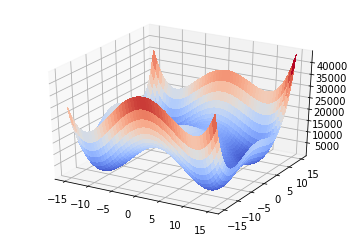

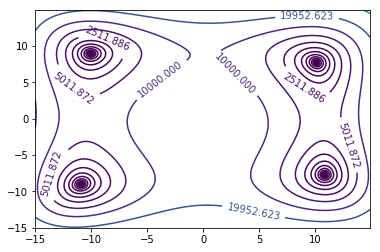

In [2]:
x = Symbol('x')
y = Symbol('y')

print('Define test function')
f    = (x**2 + y -110)**2+(x + y**2 -70)**2
disFunc('f = f(x_1,x_2) = '+latex(f))
    
'Change the symbolic function into numpy function'
f_np = lambdify((x,y), f, "numpy")

'Plot the Test function'
# Make data.
paras=[-15, 15, 0.1]
X = np.arange(*paras)
Y = np.arange(*paras)
X, Y = np.meshgrid(X, Y)
Z = f_np(X ,Y )

# Plot data.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.show()

fig = plt.figure()
cs=plt.contour(X, Y, Z, levels=10.0**np.arange(-2,5, 0.3) )
plt.clabel(cs, inline=1, fontsize=10)
plt.show()

In [4]:
"find out test function's differential fuction"

diff_x = diff(f,x)
disFunc("\\frac {\\partial f} {\\partial  x} = "+latex(diff_x))

diff_y = diff(f,y)
disFunc("\\frac {\\partial f} {\\partial y} = "+latex(diff_y))

print('Gradien vec')
grad = Matrix([diff_x,diff_y])
disFunc("G(X) = [\\frac {\\partial f} {\\partial x} , \\frac {\\partial f} {\\partial y} ] = "+latex(grad))

print('Hessian vec')
hess = hessian(f,(x,y))
# disFunc("X = [ x_1,x_2 ]")
disFunc("H(X) = "+latex(hess))


'Change the symbolic Gradien and Hessian into numpy function'
grad_np = lambdify((x,y), grad, "numpy")
hess_np = lambdify((x,y), hess, "numpy")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Gradien vec


<IPython.core.display.Math object>

Hessian vec


<IPython.core.display.Math object>

## 1.GradienDecent

In [5]:
def GradienDecent(X_0,fun,Gradient,lr=1e-3, rho=0.5,sigma = 0.4,epsilon=1e-5,Maxepoch=5000):
    dot = np.dot  
    norm = np.linalg.norm
    vals = X_0.T.copy()
#     print(Gradient(*vals))
    for i in range(Maxepoch):
        gk = Gradient(*vals)
        # -gk means function minimizing
        dk = -gk
        if norm(dk) < epsilon:  break    
            
        vals += lr * dk.T[0]
        yield vals,fun(*vals)
        
#         This part is extended reading, which called linear search, intend to find out good gradient step-size
#         In other words,'learning rate' of gradient
#         m,mk = (0,0)
#         f0 = fun(*vals)
#         for m in range(20):
#             v1 = (vals+rho**m*dk.T[0])
#             f1 = fun(*v1)
#             if f1 < f0 + sigma*rho**m*gk.T.dot(dk):
#                 mk=m
#                 break        
#         vals += rho**mk* dk.T[0]
#         if mk==0:
#             yield vals,f0
#         else:
#             yield vals,f1

In [19]:
np_toFloat = lambda x : np.asarray(x).astype(np.float32)
processList=np.zeros((5001,3))
processList[0] = [0,-1, f_np(0,-1)]
# set counter 
cnt=1
for i in GradienDecent( processList[0][:2], f_np,grad_np):
    processList[cnt]=np.append(i[0],i[-1])
    cnt+=1
processList=processList[:cnt]
print('GradienDecent converged at step :',cnt-1)
print('GradienDecent converged minimization :',processList[-1])

GradienDecent converged at step : 45
GradienDecent converged minimization : [  1.08485482e+01  -7.69099809e+00   3.91932314e-14]


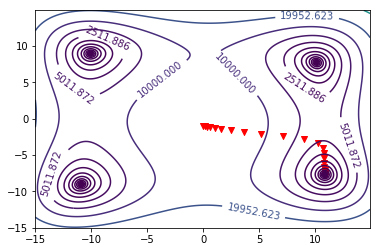

In [15]:
'Show how is it moving'
fig = plt.figure()
plt.clabel( plt.contour(X, Y, Z, levels=10.0**np.arange(-2,5, 0.3)), inline=1, fontsize=10)
plt.scatter(*processList.T[:2].tolist(), c='r', marker='v')
plt.show() 

## 7.L_BFGS
2 to 6 method will introduce at the end

In [16]:
def L_BFGS(X_0,fun,Gradient,lr=0.9, memo=5, rho=0.5 ,sigma = 0.4,epsilon=1e-5,Maxepoch=5000):
    norm = np.linalg.norm
    vals = X_0.copy()
    s = [];y = [];Rho = [];alpha = list(range(memo));beta = list(range(memo))
    
    for k in range(Maxepoch):
        gk = Gradient(*vals)
        if norm(gk) < epsilon: break
        q = gk.copy()
        
        for i in range(len(s)-1,-1,-1):
            alpha[i] =  Rho[i] * np.sum(s[i]*q)
            q -= alpha[i] * y[i]
            
        h0 = np.sum(s[-1]*y[-1])/np.sum(y[-1]*y[-1]) if k >0 else 1
        z = h0 * q

        for i in range(len(s)):
            beta = Rho[i] * np.sum(z*y[i])
            z += (alpha[i]-beta) * s[i]
            
        dk = -z          
#         linear search
#         m,mk = (0,0)
#         f0 = fun(*vals)
#         for m in np.arange(0,5,1):
#             v1 = (vals + rho**m * dk.T[0])
#             f1 = fun(*v1)
#             if f1 < f0 + sigma* rho**m * np.sum(dk*gk):
#                 mk=m
#                 break  
              
        if len(s) >= memo: s.pop(0);y.pop(0);Rho.pop(0)
            
        s.append(lr * dk)#1e-1 * dk)#rho**mk * dk)
        vals += s[-1].T[0]
        y.append( Gradient(*vals) - gk )
        Rho.append( 1/np.sum(y[-1]*s[-1]) )
#         print(f0)
#         if mk==0:
#             yield vals,f0
#         else:
#             yield vals,f1
        yield vals,fun(*vals)

In [20]:
np_toFloat = lambda x : np.asarray(x).astype(np.float32)
processList=np.zeros((5001,3))
processList[0] = [0,-1, 0]
processList[0,2] = f_np(*processList[0][:2])
cnt=1
for i in L_BFGS( processList[0][:2], f_np,grad_np):
    processList[cnt]=np.append(i[0],i[-1])
    cnt+=1
processList=processList[:cnt]
print('L_BFGS converged at step :',cnt-1)
print('L_BFGS converged minimization :',processList[-1])

L_BFGS converged at step : 14
L_BFGS converged minimization : [  1.08485482e+01  -7.69099810e+00   5.70545410e-15]


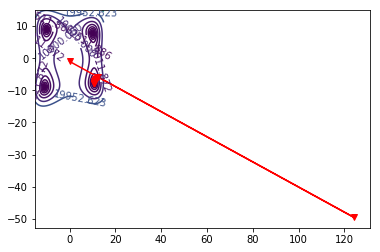

In [21]:
'Show how is it moving'
fig = plt.figure()
plt.clabel( plt.contour(X, Y, Z, levels=10.0**np.arange(-2,5, 0.3)), inline=1, fontsize=10)
plt.plot(*processList.T[:2].tolist(), c='r', marker='v')
plt.show() 

### Summary
Both Gradient descent and L_BFGS are very practical optimization method nowaday.

But we can rarely see L_BFGS be used at machine learning. So sometimes you must code it yourself.

In [32]:
'L_BFGS scipy implement'
from scipy.optimize import minimize
def f_np2(x):
    return f_np(*x)
def grad_np2(x):
    return grad_np(*x)
res = minimize(method='L-BFGS-B', x0=[0,-1], fun=f_np2, jac=grad_np2, options={'gtol': 1e-5, 'disp': True})
res

      fun: 3.0471931068748683e-16
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([[ -6.68529546e-07],
       [ -2.62898647e-07]])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 9
   status: 0
  success: True
        x: array([ 10.8485482,  -7.6909981])

### Apply L_BFGS to machine learning

In [90]:
'Codes here are the same as Tutorial 2'
from keras.datasets import mnist
from keras.utils import np_utils

# set up MNIST data sets, required keras lib
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)/255.0
X_test = X_test.reshape(10000, 784)/255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('X_train.shape',X_train.shape,'\t y_train.shape',y_train.shape)

batchSize = 3000
getRandBatch = lambda : np.random.choice(np.arange(len(X_train)),batchSize).astype(np.int32)

'input :784 units, output layer:10 units'
layers=(784, 10)
NN = np.random.rand(*layers).astype(np.float32)*2-1
print('NN.shape',NN.shape)

X_train.shape (60000, 784) 	 y_train.shape (60000, 10)
NN.shape (784, 10)


In [121]:
def softmax(x):
    tmp=np.exp(x-x.max(1).reshape(-1,1))
    return tmp/tmp.sum(1).reshape(-1,1)

def mean_entropy(predict,y):
    return (-y*np.log(predict)).sum(1).mean()


# batchTrain = X_train[:,:]
# batchTrainLabels = y_train[:,:]
def f_NN(NN):
    batchIdx = getRandBatch()
    batchTrain = X_train[batchIdx,:].astype(np.float32)
    batchTrainLabels = y_train[batchIdx,:].astype(np.float32)
    
    predict=softmax(batchTrain.dot(NN.reshape(layers)))
    return mean_entropy(predict, batchTrainLabels)

def grad_NN(NN):
    error = batchTrainLabels - softmax(batchTrain.dot(NN.reshape(layers)))
    return np.ndarray.flatten(batchTrain.T.dot(error)/len(batchTrainLabels))

In [122]:
'Try it on scipy implement first'
import time
start = time.time()
res = minimize(method='L-BFGS-B', x0=NN, fun=f_NN, jac=grad_NN, options={'gtol': 1e-5, 'disp': True})
print(res)
print("final acc:",
      (np.argmax(softmax(batchTrain.dot(res.x.reshape(layers))),1)==np.argmax(batchTrainLabels,1)).sum()/len(batchTrainLabels)*100)   
print('cost time:',time.time()-start)

      fun: 6.5128737542513271
 hess_inv: <7840x7840 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0.,  0., ...,  0.,  0.,  0.])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 21
      nit: 0
   status: 2
  success: False
        x: array([ 0.21382725,  0.43843865,  0.26076639, ...,  0.95582557,
        0.05820668, -0.0365535 ])
final acc: 11.8433333333
cost time: 29.764702558517456


### Neither batch set nor  all data set on it result successfully 

In [153]:
'input :784 units, output layer:10 units'
layers=(784, 10)
NN = np.random.rand(*layers).astype(np.float32)*2-1
print('NN.shape',NN.shape)

NN.shape (784, 10)


In [154]:
def f_NN(*NN):
    batchIdx = getRandBatch()
    batchTrain = X_train[batchIdx,:].astype(np.float32)
    batchTrainLabels = y_train[batchIdx,:].astype(np.float32)
    NN = np.asarray(NN)
    predict=softmax(batchTrain.dot(NN.reshape(layers)))
    return mean_entropy(predict, batchTrainLabels)

def grad_NN(*NN):
    NN = np.asarray(NN)
    error = batchTrainLabels - softmax(batchTrain.dot(NN.reshape(layers)))
    return np.ndarray.flatten(batchTrain.T.dot(error)/len(batchTrainLabels)).reshape(-1,1)

In [170]:
'Try it on our implement'
import time
start = time.time()
processList=np.zeros((5001,7841))
processList[0] = np.append([NN.flatten()],0)
processList[0,-1] = f_NN(NN.flatten())
cnt=1
for i in L_BFGS( processList[0][:-1], f_NN,grad_NN, Maxepoch=20):
    processList[cnt]=np.append(i[0],i[-1])
    print('step:',cnt,',mean_entropy:',processList[cnt,-1])
    cnt+=1
processList=processList[:cnt]
print('L_BFGS converged at step :',cnt-1)
print('L_BFGS converged minimization :',processList[-1])
predict=softmax(batchTrain.dot(processList[-1,:-1].reshape(layers)))
print('final acc:',(np.argmax(predict,1)==np.argmax(batchTrainLabels,1)).sum()/len(batchTrainLabels)*100 )   
print('cost time:',time.time()-start)

step: 1 :mean_entropy: 15.0379431637
step: 2 :mean_entropy: 5.75980173961
step: 3 :mean_entropy: 4.23678314424
step: 4 :mean_entropy: 3.18770103143
step: 5 :mean_entropy: 2.30695961441
step: 6 :mean_entropy: 1.61671135472
step: 7 :mean_entropy: 1.29811618887
step: 8 :mean_entropy: 1.16175809672
step: 9 :mean_entropy: 0.922410297875
step: 10 :mean_entropy: 0.92618993585
step: 11 :mean_entropy: 0.882129526532
step: 12 :mean_entropy: 0.784414126112
step: 13 :mean_entropy: 0.726208057785
step: 14 :mean_entropy: 0.727979093977
step: 15 :mean_entropy: 0.68477330466
step: 16 :mean_entropy: 0.555384405447
step: 17 :mean_entropy: 0.611726924845
step: 18 :mean_entropy: 0.605173073272
step: 19 :mean_entropy: 0.558278453668
step: 20 :mean_entropy: 0.552815287451
L_BFGS converged at step : 20
L_BFGS converged minimization : [-0.86464983  0.77541995 -0.16219485 ...,  0.75290895  0.80194581
  0.55281529]
final acc: 87.3666666667
cost time: 51.38693928718567


### Congratulation !! it works successfully
That is why we need to code things ourself somtimes.